<center><h1>GLMs with Interaction Effects in R</h1></center>

# 1. Interaction Effects

- Often called "moderation", or statistical moderation effects
- One variable "behaves" differently depending on the level another
- E.g. cigarette smoking is an _increasingly strong_ predictor of lung cancer as age increases


# 2. Logistic Regression with Interaction Effect

- Using `titanic` data 
- Predicting survival using age and sex

In [16]:
library(broom)
library(ggplot2)

titanic_df <- read.csv("data/titanic_subset.csv")

head(titanic_df)

,passenger_id,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


## 2.1 Fitting Model with Interaction Term

In [18]:
fm3 <- glm(survived ~ sex + age + age*sex, titanic_df, family = binomial(link = "logit"))

tidy(fm3)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),0.59380093,0.31032443,1.913484,0.055686078
sexmale,-1.31775110,0.40842445,-3.226426,0.001253468
age,0.01970198,0.01057286,1.863449,0.062399191
sexmale:age,-0.04111845,0.01355105,-3.034336,0.002410658


### 2.1.1 Plotting the Effects

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 177 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 177 rows containing missing values (geom_point).”


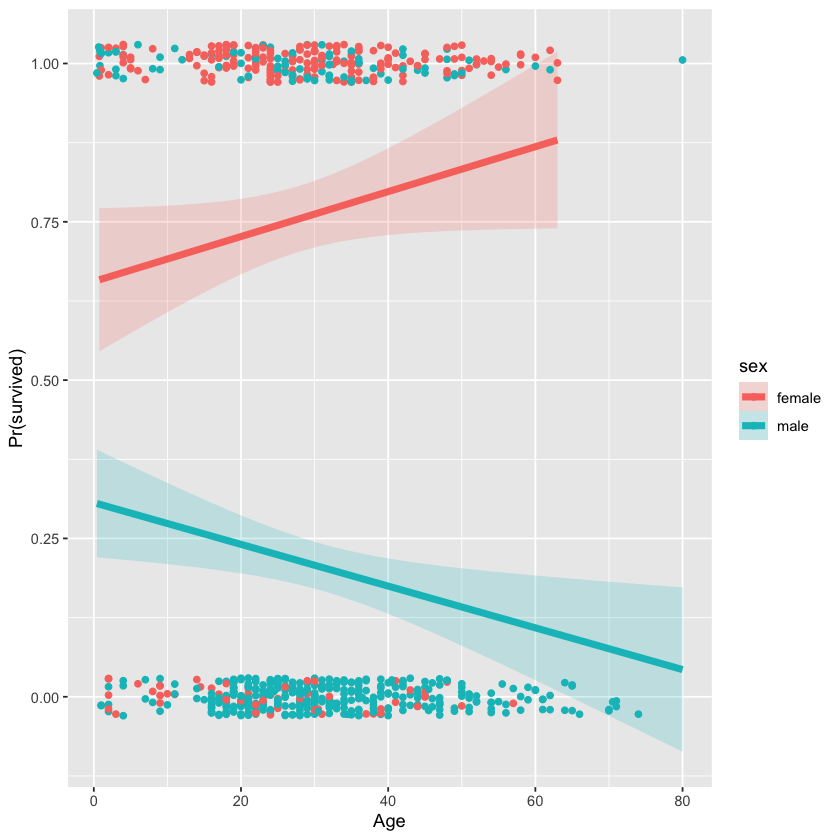

In [20]:
ggplot(titanic_df, aes(x = age, y = as.numeric(survived), color = sex)) +
    stat_smooth(method = "glm", alpha = 0.2, size = 2, aes(fill = sex)) +
    geom_point(position=position_jitter(height = 0.03, width = 0)) +
    xlab("Age") + 
    ylab("Pr(survived)")

### 2.1.2 Predictions using Fitted Model

In [24]:
fm2 <- glm(survived ~ age + sex + age*sex, titanic_df, family = binomial(link = "logit"))

predict(fm2, newdata=data.frame(age = 50, sex = "female"), type = "response")

1 
0.8290487